<p style= "color: black; font-size: 40px; background: orange; padding: 30px; border-radius: 100px; text-align: center; font-family: Arial">Style Transfer</p>
<br>
<p style= "color: cyan; font-size: 18px; font-family: Arial; line-height: 40px">In this notebook we will implemente a style transfer using <span style= "color: orange">Tensorflow 2</span>. We will use the model VGG19 from tensorflow. In order to implement the model, we will rely on the following paper:
</p>
<p style= "color: red; font-family: Times New Roman; width: 100%; text-align: center">https://arxiv.org/pdf/1508.06576.pdf</p>
<br>

In [36]:
import os 
import tensorflow as tf
import numpy as np
from utils import utils
import matplotlib.pyplot as plt
import IPython.display as display

### The Starry Night Style

In [37]:
# Load content image and style image
content_image_path= os.path.join('contents', 'original.jpeg')
style_image_path= os.path.join('styles', 'style1.jpg')
# Load images
content_image= utils.load_img(content_image_path, limit_pixels_to= 400) # (1, 500, 500, 3)
style_image= utils.load_img(style_image_path, limit_pixels_to= 400)

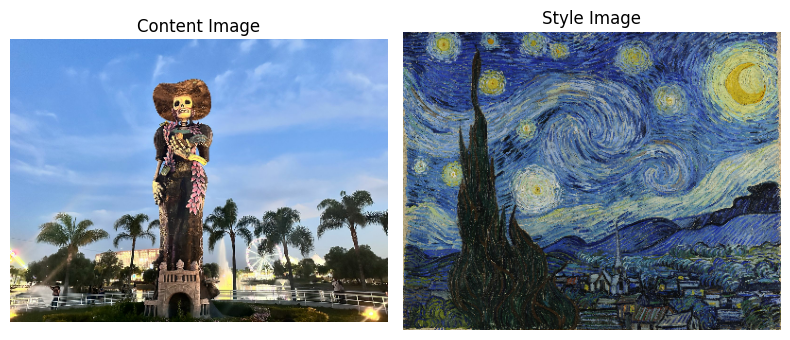

In [38]:
# Display the Images
fig, ax= plt.subplots(1,2, figsize= (8,8))
ax[0].imshow(content_image[0])
ax[0].set_title('Content Image')
ax[0].axis(False)

ax[1].imshow(style_image[0])
ax[1].set_title('Style Image')
ax[1].axis(False)
plt.tight_layout()
plt.show()

In [39]:
# Define the content layers and style layers
content_layers= ['block5_conv2']
style_layers= ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [40]:
total_variation_weights= 50
# Build the train_step function
optimizer = tf.optimizers.Adam(learning_rate= 0.02, beta_1=0.99, epsilon=1e-1)
@tf.function
def train_step(image, content_target, style_target):
    with tf.GradientTape() as g:
        content_style_features= model(image)
        loss= utils.style_content_loss(content_style_features, 
                            style_target, content_target, style_weight= 0.001, content_weight= 100)
        loss += total_variation_weights * tf.image.total_variation(image) # Reduce the noise
    gradients= g.gradient(loss, image)
    optimizer.apply_gradients([(gradients, image)])
    image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max= 1.0))
    return loss

# Define the model to get the feature maps
model= utils.StyleContentModel(style_layers, content_layers)

In [41]:
# Define Content target and Style target
content_target= model(content_image)['content']
style_target= model(style_image)['style']

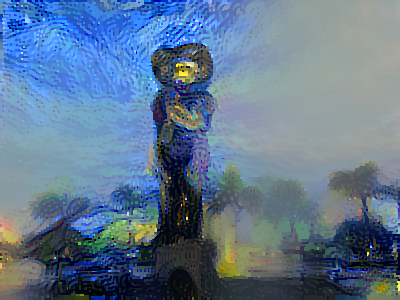


Epoch: 100 Loss: 868554.75


In [42]:
# Main Loop
epochs= 100
steps_per_epoch= 10

image= tf.Variable(content_image)

for e in range(epochs):
    for s in range(steps_per_epoch):
        loss= train_step(image, content_target, style_target)
        print("-", end='', flush= True)
    display.clear_output(wait= True)
    display.display(utils.tensor_to_image(image))
    print('\nEpoch: {} Loss: {}'.format(e+1, loss.numpy()[0]))

#### The Scream Style

In [43]:
# Load style image
style_image_path= os.path.join('styles', 'style2.jpg')
# Load images
style_image= utils.load_img(style_image_path, limit_pixels_to= 400)

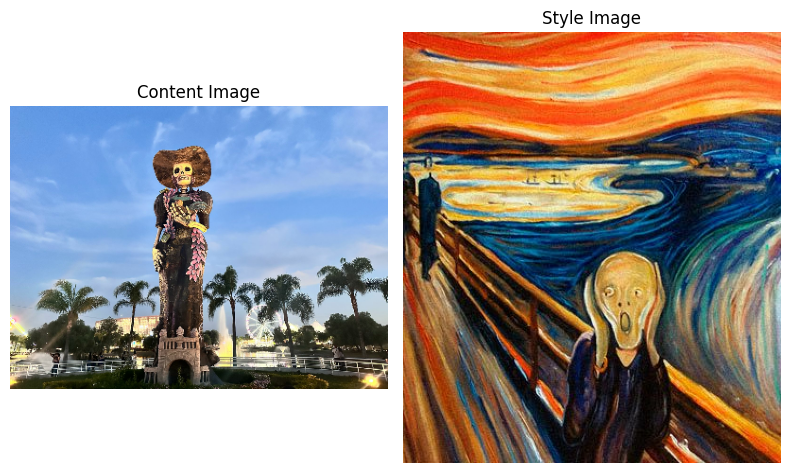

In [44]:
# Display the Images
fig, ax= plt.subplots(1,2, figsize= (8,8))
ax[0].imshow(content_image[0])
ax[0].set_title('Content Image')
ax[0].axis(False)

ax[1].imshow(style_image[0])
ax[1].set_title('Style Image')
ax[1].axis(False)
plt.tight_layout()
plt.show()

In [45]:
# Define  Style target
style_target= model(style_image)['style']

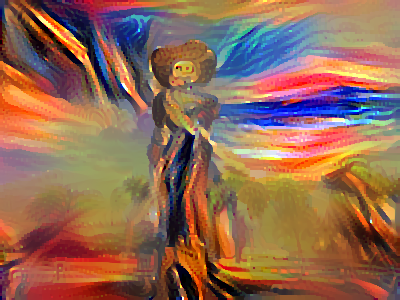


Epoch: 100 Loss: 1128447.0


In [47]:
# Main Loop
epochs= 100
steps_per_epoch= 10

image= tf.Variable(content_image)

for e in range(epochs):
    for s in range(steps_per_epoch):
        loss= train_step(image, content_target, style_target)
        print("-", end='', flush= True)
    display.clear_output(wait= True)
    display.display(utils.tensor_to_image(image))
    print('\nEpoch: {} Loss: {}'.format(e+1, loss.numpy()[0]))

### Picasso Style

In [48]:
# Load style image
style_image_path= os.path.join('styles', 'style3.jpg')
# Load images
style_image= utils.load_img(style_image_path, limit_pixels_to= 400)

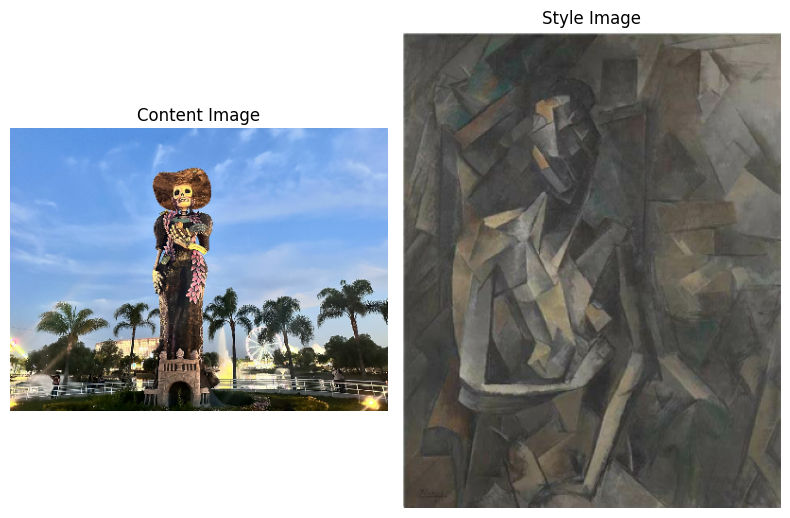

In [49]:
# Display the Images
fig, ax= plt.subplots(1,2, figsize= (8,8))
ax[0].imshow(content_image[0])
ax[0].set_title('Content Image')
ax[0].axis(False)

ax[1].imshow(style_image[0])
ax[1].set_title('Style Image')
ax[1].axis(False)
plt.tight_layout()
plt.show()

In [50]:
# Define  Style target
style_target= model(style_image)['style']

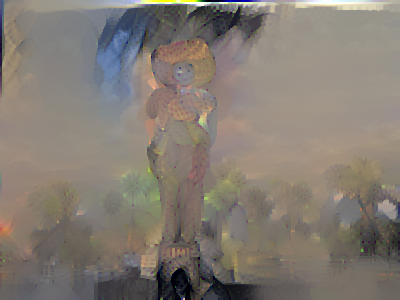


Epoch: 100 Loss: 444274.28125


In [51]:
# Main Loop
epochs= 100
steps_per_epoch= 10

image= tf.Variable(content_image)

for e in range(epochs):
    for s in range(steps_per_epoch):
        loss= train_step(image, content_target, style_target)
        print("-", end='', flush= True)
    display.clear_output(wait= True)
    display.display(utils.tensor_to_image(image))
    print('\nEpoch: {} Loss: {}'.format(e+1, loss.numpy()[0]))